In [21]:
import numpy as np 
import pandas as pd 
from sklearn.impute import  SimpleImputer

In [22]:
# univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension
# SimpleImputer is one of the example
# multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. IterativeImputer).
df = pd.read_csv('titanic_toy.csv')
print("The number of empty values are: \n",df.isna().sum())
print("The percentage of empty values are: \n", (df.isna().mean() *100))
df.head()


The number of empty values are: 
 Age         177
Fare         45
Family        0
Survived      0
dtype: int64
The percentage of empty values are: 
 Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64


,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [23]:
imp = SimpleImputer(missing_values=np.nan, strategy = 'mean')
#imp.fit_transform([[1, 2], [np.nan, 3], [7, 6]])
# When we use imp.fit() the values are stored in imp
fareValues = imp.fit_transform([df['Fare']])
print(type(fareValues))

<class 'numpy.ndarray'>


c:\Users\abhinav.aggarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:565: UserWarning: Skipping features without any observed values: [ 40  82  98 133 162 194 211 229 251 259 266 271 281 305 316 327 336 355
 373 378 400 418 429 434 466 469 490 513 518 520 521 562 633 649 662 673
 698 702 763 816 831 860 871 878 889]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [24]:
df.isna().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [25]:
# So one way is univariate imputation -> Taking help of one column
# Other is taking for help of more columns -> Iterative Imputer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [26]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
print("The percentage of empty values are: \n", X_train.isnull().mean()) 

The percentage of empty values are: 
 Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64


In [47]:
# If missing data is less than 5% then replace na values by mean or medium

In [29]:
## Using strategy = most_frequent
df = pd.DataFrame([["a", "x"],[np.nan, "y"],["a", np.nan],["b", "y"]], dtype="category")
imp = SimpleImputer(strategy='most_frequent')
someVal = imp.fit_transform(df)
someVal

array([['a', 'x'],
       ['a', 'y'],
       ['a', 'y'],
       ['b', 'y']], dtype=object)

### Multivariate Feature Imputation

In [48]:
""" 
The advantages of using imputer are:
1. Can replace any value if nan or any other


""" 

' \nThe advantages of using imputer are:\n1. Can replace any value if nan or any other\n\n\n'

In [49]:
## For missing categorical data
# If more than 10 percent categorical data is missing then mention it as misssing

In [55]:
data = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
print(data.shape)
data.head()

(1460, 3)


,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [57]:
print(data.isna().sum())
print("\n The percentage of missing data is: \n")
data.isna().mean()*100

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

 The percentage of missing data is: 



FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

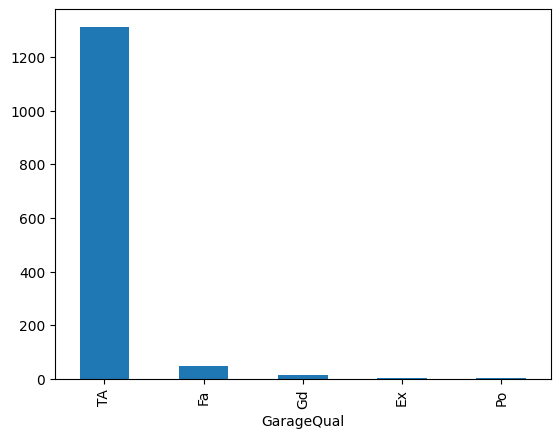

In [64]:
import matplotlib.pyplot as plt
# Plotting for within GarageQual
data['GarageQual'].value_counts().plot(kind = 'bar')

In [66]:
data['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

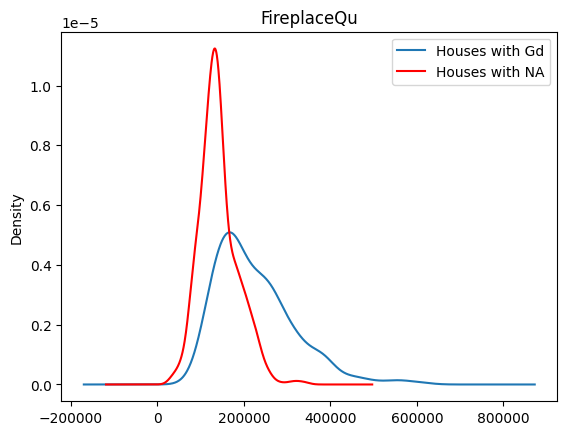

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)
# Salesprice is required feature so comparing the feature with both 
data[data['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

data[data['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [71]:
## Using Nearest Neighbour Imputer
from sklearn.impute import KNNImputer
nan = np.nan
X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])